1.Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_rows', None)


pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data = pd.read_csv(r"C:\Users\syed9\Desktop\rty\Exist Test\customer_churn.csv")


In [3]:
df = customer_data.copy()

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.shape

(7043, 21)

In [8]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0.0,No,No,66.0,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64

In [10]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=['number']).columns

In [11]:
for col in cat_col:
    df[col] = df[col].fillna(df[col].mode()[0])



In [12]:
for col in num_col:
    df[col] = df[col].fillna(df[col].median())

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [18]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


2.Exploratory Data Analysis (EDA)

Bivariate Analysis 

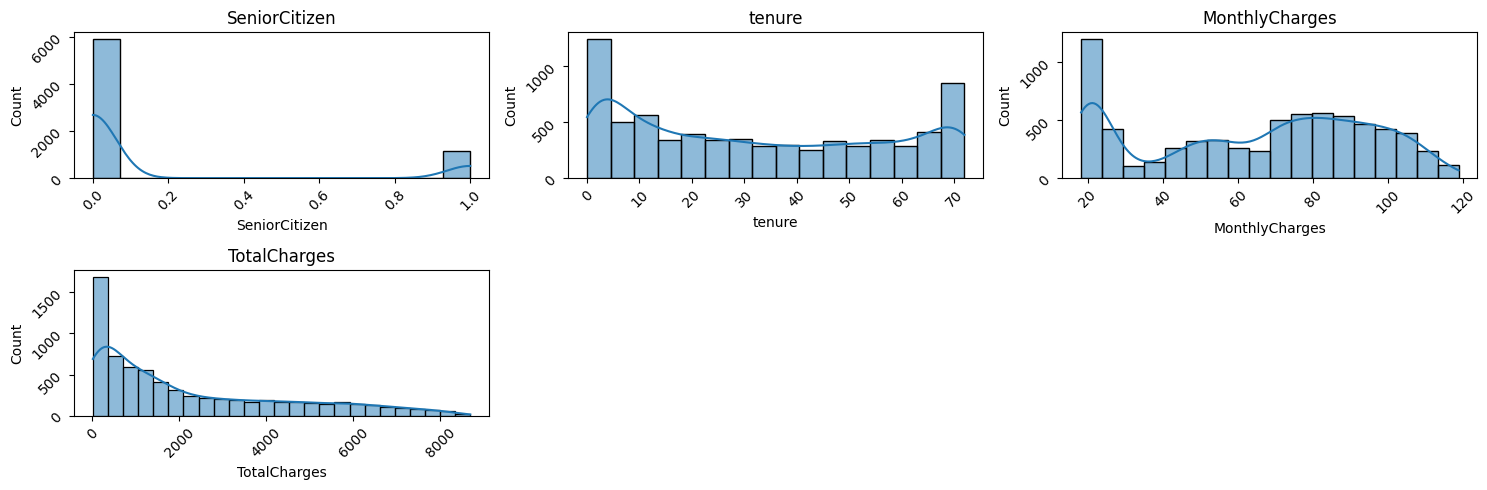

In [19]:
num_col = df.select_dtypes(include=['number']).columns

cols_per_row = 3

rows = math.ceil(len(num_col)/cols_per_row)

fig, axis = plt.subplots(rows,cols_per_row,figsize=(15,5))
axis = axis.flatten()
for i,col in enumerate(num_col):
      sns.histplot(data=df,x = col,ax=axis[i],kde=True)
      axis[i].set_title(col)
      axis[i].tick_params(rotation= 45)

for j in range(len(num_col),len(axis)):
      fig.delaxes(axis[j])
      
plt.tight_layout()
plt.show()            

Categorical columns 

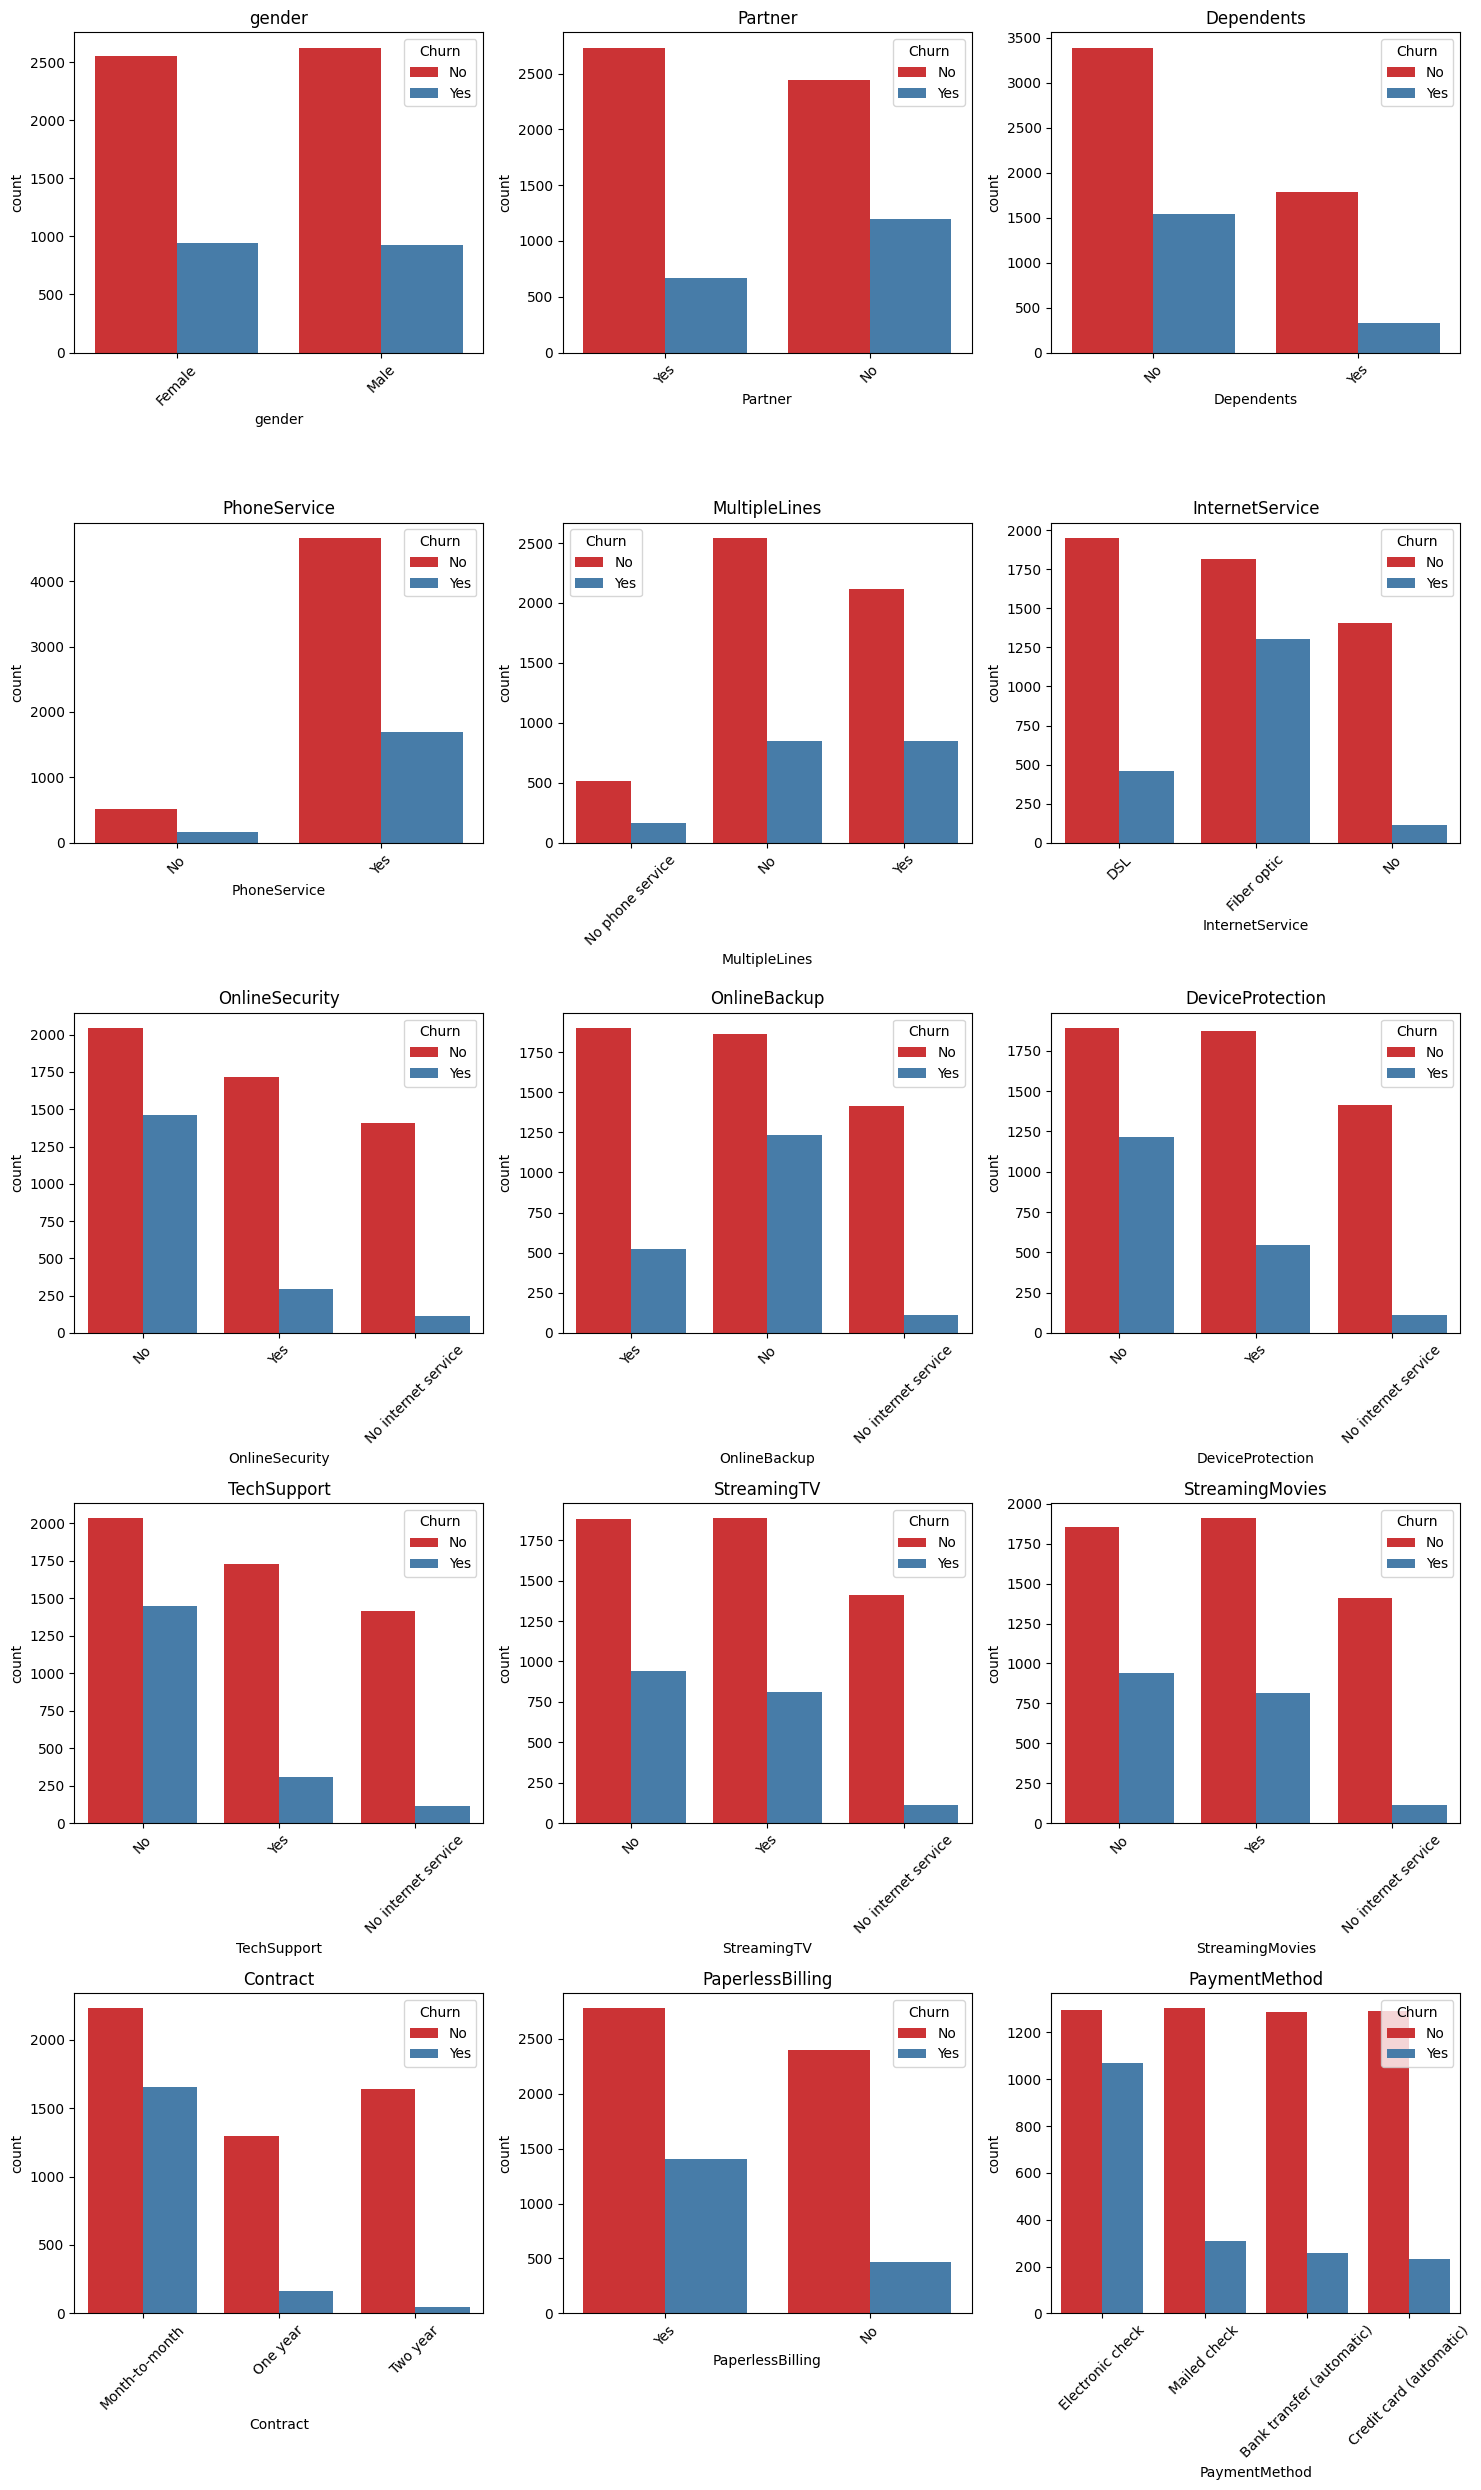

In [20]:

cat_col = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in cat_col:
    cat_col.remove('customerID')
if 'Churn' in cat_col:
    cat_col.remove('Churn')
if 'TotalCharges' in cat_col:
    cat_col.remove('TotalCharges')   

cols_per_row = 3
rows = math.ceil(len(cat_col) / cols_per_row)

fig, axis = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
axis = axis.flatten()

for i, col in enumerate(cat_col):
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1', ax=axis[i])  
    axis[i].set_title(col)
    axis[i].tick_params(axis='x', rotation=45)

for j in range(len(cat_col), len(axis)):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()
 

Correlation Matrix (Heatmap)

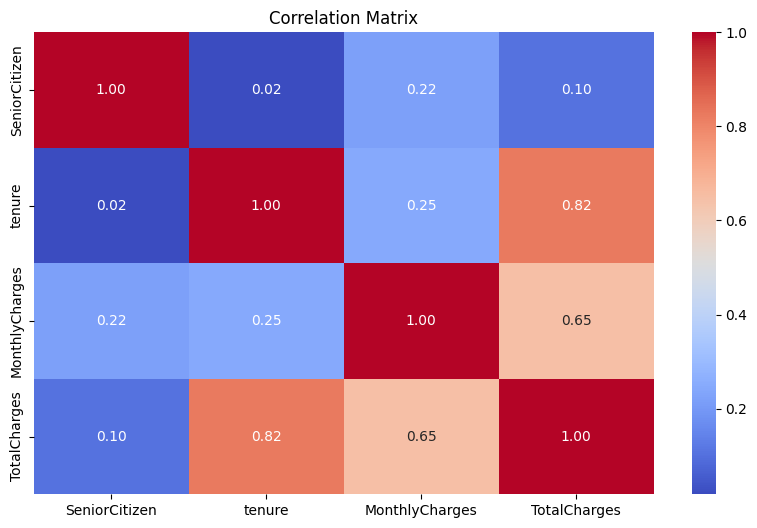

In [21]:
corr_matrix = df[num_col].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Encoding Binary Columns

In [23]:

df['Partner'] = df['Partner'].fillna('No')
df['Dependents'] = df['Dependents'].fillna('No')
df['PhoneService'] = df['PhoneService'].fillna('No')
df['Churn'] = df['Churn'].fillna('No')
df['PaperlessBilling'] = df['PaperlessBilling'].fillna('No')

df['tenure'] = df['tenure'].fillna(df['tenure'].mean())
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

df['gender'] = df['gender'].fillna('Unknown')


print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No     1.0           No   
1  5575-GNVDE    Male            0.0      No         No    34.0          Yes   
2  3668-QPYBK    Male            0.0      No         No     2.0          Yes   
3  7795-CFOCW    Male            0.0      No         No    45.0           No   
4  9237-HQITU  Female            0.0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No        

In [24]:
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female            0.0        1           0     1.0   
1  5575-GNVDE    Male            0.0        0           0    34.0   
2  3668-QPYBK    Male            0.0        0           0     2.0   
3  7795-CFOCW    Male            0.0        0           0    45.0   
4  9237-HQITU  Female            0.0        0           0     2.0   

   PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0             0  No phone service             DSL             No          Yes   
1             1                No             DSL            Yes           No   
2             1                No             DSL            Yes          Yes   
3             0  No phone service             DSL            Yes           No   
4             1                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No  

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0.0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,0,0,2.0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,0,0,45.0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,0,0,2.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [26]:

df = pd.get_dummies(df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

bool_columns = df.select_dtypes(include=['bool']).columns

df[bool_columns] = df[bool_columns].astype(int)

print(df.head())



   customerID  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  7590-VHVEG            0.0        1           0     1.0             0   
1  5575-GNVDE            0.0        0           0    34.0             1   
2  3668-QPYBK            0.0        0           0     2.0             1   
3  7795-CFOCW            0.0        0           0    45.0             0   
4  9237-HQITU            0.0        0           0     2.0             1   

      MultipleLines OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0  No phone service             No          Yes               No          No   
1                No            Yes           No              Yes          No   
2                No            Yes          Yes               No          No   
3  No phone service            Yes           No              Yes         Yes   
4                No             No           No               No          No   

  StreamingTV StreamingMovies  PaperlessBilling  MonthlyCharges  Tot

Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']


df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


print(df.head())


   customerID  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0  7590-VHVEG            0.0        1           0  0.013889             0   
1  5575-GNVDE            0.0        0           0  0.472222             1   
2  3668-QPYBK            0.0        0           0  0.027778             1   
3  7795-CFOCW            0.0        0           0  0.625000             0   
4  9237-HQITU            0.0        0           0  0.027778             1   

      MultipleLines OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0  No phone service             No          Yes               No          No   
1                No            Yes           No              Yes          No   
2                No            Yes          Yes               No          No   
3  No phone service            Yes           No              Yes         Yes   
4                No             No           No               No          No   

  StreamingTV StreamingMovies  PaperlessBilling  Monthly

Splitting Data into Features and Target

In [28]:

X = df.drop(['customerID', 'Churn'], axis=1) 
y = df['Churn']  

print(X.shape, y.shape)


(7043, 23) (7043,)


Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5634, 23) (1409, 23) (5634,) (1409,)


In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric missing values with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical missing values with mode


label_encoder = LabelEncoder()
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'].astype(str))
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'].astype(str))
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'].astype(str))
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'].astype(str))
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'].astype(str))
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'].astype(str))
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'].astype(str))
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'].astype(str))
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'].astype(str))

X = df.drop(columns=['Churn', 'customerID']) 
y = df['Churn']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print(y_pred[:10])


[1 0 0 1 0 0 0 0 0 0]


In [34]:
from sklearn.metrics import classification_report, confusion_matrix


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
 [[933 103]
 [152 221]]


The classification report and confusion matrix provide a detailed evaluation of your model's performance:

Classification Report:
Precision:

For class 0 (customers predicted not to churn): 0.86 (86% of the predicted non-churning customers were correct).

For class 1 (customers predicted to churn): 0.68 (68% of the predicted churning customers were correct).

Recall:

For class 0: 0.90 (90% of actual non-churning customers were correctly identified).

For class 1: 0.59 (59% of actual churning customers were correctly identified).

F1-Score:

For class 0: 0.88

For class 1: 0.63

Accuracy: The overall accuracy of the model is 82%, meaning 82% of the predictions are correct.

Macro Average: This is the average of the precision, recall, and F1-score across both classes, treating each class equally.

Precision: 0.77

Recall: 0.75

F1-Score: 0.76

Weighted Average: This takes the support (number of samples) of each class into account, so it is biased towards the more frequent class.

Precision: 0.81

Recall: 0.82

F1-Score: 0.81

Confusion Matrix:
The confusion matrix shows how the model's predictions match the actual values:

True Negatives (933): Customers predicted not to churn and actually not churning.

False Positives (103): Customers predicted to churn but actually did not churn.

False Negatives (152): Customers predicted not to churn but actually churned.

True Positives (221): Customers predicted to churn and actually churned.

Key Insights:
The model has high precision and recall for predicting customers not to churn (class 0), meaning it does a good job identifying customers who are likely to stay.

The model's performance for predicting churn (class 1) could be improved, as indicated by lower recall (59%) and precision (68%). This suggests that the model misses many customers who are actually going to churn.

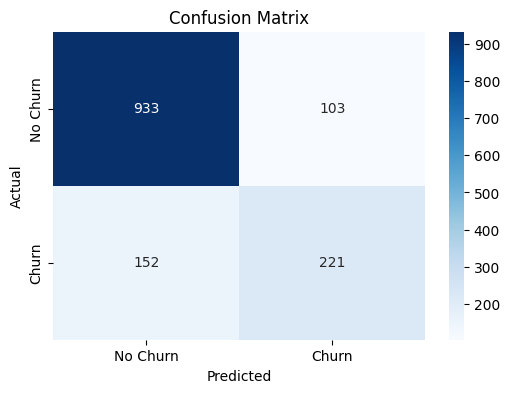

In [ ]:
#Visualizing the Results

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


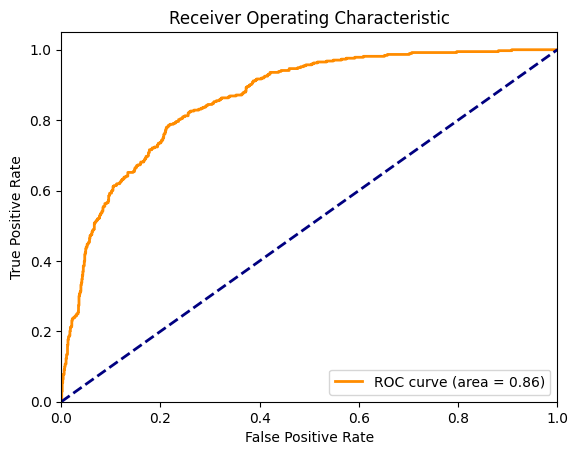

In [37]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
